<a href="https://colab.research.google.com/github/thesalmonification/DSCI400_Revamp/blob/master/Downsample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [0]:
############################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Mount Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Read Waveform Session Numbers

In [0]:
#Import the waveform of the HDF5
keys = pd.read_csv('/content/drive/Shared drives/DSCI400_Revamp/Waveform_Data_Keys.csv',header=None)
keys = list(keys[0])

Downsample Waveforms

In [0]:
#Iterate over all waveforms; downsample by a rate of 4 (this goes from 256Hz to 64Hz which prevents any alaising/information loss)

for key in keys:
  print(key)

  #open the waveform table
  waveforms = pd.read_hdf('/content/drive/Shared drives/DSCI400_Revamp/Waveform_Vocoded_Equalized_Data.h5',key=key)

  #Downsample by 4 (ie take every 4th sample)
  waveforms = waveforms.iloc[::4,:]

  #Save to a new HDF5 file  
  waveforms.to_hdf('/content/drive/Shared drives/DSCI400_Revamp/Waveform_Vocoded_Equalized_Downsampled_Data.h5',key=key,complevel=4,format='table')



t2754
t276
t2762
t2760
t2750
t2752
t2764
t2756
t2758
t2766
t2748
t2744
t274
t2738
t2734
t2740
t2746
t2742
t2736
t2732
t3402
t3384
t3386
t3390
t3396
t34
t3400
t3394
t3388
t3398
t3392
t3382
t32
t3154
t3152
t3146
t3160
t3150
t3156
t3148
t3144
t3158
t3142
t396
t394
t3810
t392
t3806
t3802
t3804
t3800
t3808
t38
t3798
t3782
t3794
t3788
t3792
t3780
t3790
t3784
t3786
t3796
t1710
t1708
t170
t1694
t1702
t1704
t1696
t1700
t1698
t1706
t1692
t168
t160
t162
t166
t1596
t164
t1600
t1598
t16
t1594
t1730
t18
t1728
t1726
t1724
t1722
t1720
t1718
t1716
t2640
t2636
t2634
t270
t268
t2638
t264
t1714
t266
t2632
t2630
t2616
t2624
t2620
t2626
t262
t2614
t2618
t2622
t2628
t2612
t2608
t2604
t2610
t2370
t26
t2602
t2368
t2366
t2606
t2364
t2354
t2356
t2346
t2348
t2350
t2360
t2352
t2362
t2358
t2344
t2250
t2342
t2242
t2248
t2244
t2240
t2246
t2238
t2236
t2234
t2232
t2226
t2216
t2224
t2218
t2220
t2214
t2230
t2228
t2222
t2212
t22
t146
t144
t3138
t3126
t3128
t3124
t3132
t142
t3130
t3136
t3134
t3122
t3026
t3016
t3030
t3020
t

View Pre/Post-sampled Signal

(24320,)
(6080,)


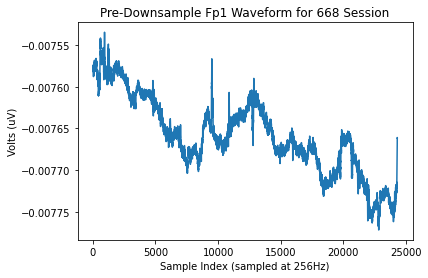

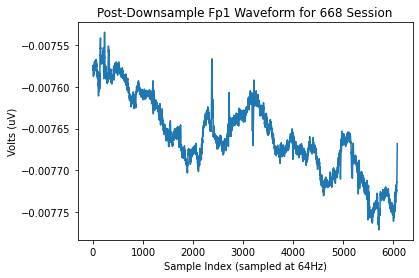

In [0]:
#View the difference between a pre/post downsampled waveform as a sanity check...

pre_downsample = pd.read_hdf('/content/drive/Shared drives/DSCI400_Revamp/Waveform_Vocoded_Equalized_Data.h5',key='t24')
post_downsample = pd.read_hdf('/content/drive/Shared drives/DSCI400_Revamp/Waveform_Vocoded_Equalized_Downsampled_Data.h5',key='t24')


plt.plot(pre_downsample['AF3'].to_numpy())
plt.title('Pre-Downsample Fp1 Waveform for 668 Session')
plt.xlabel('Sample Index (sampled at 256Hz)')
plt.ylabel('Volts (uV)')
plt.figure()
plt.plot(post_downsample['AF3'].to_numpy())
plt.title('Post-Downsample Fp1 Waveform for 668 Session')
plt.xlabel('Sample Index (sampled at 64Hz)')
plt.ylabel('Volts (uV)')

print(pre_downsample['AF3'].to_numpy().shape)
print(post_downsample['AF3'].to_numpy().shape)